**Question 1**

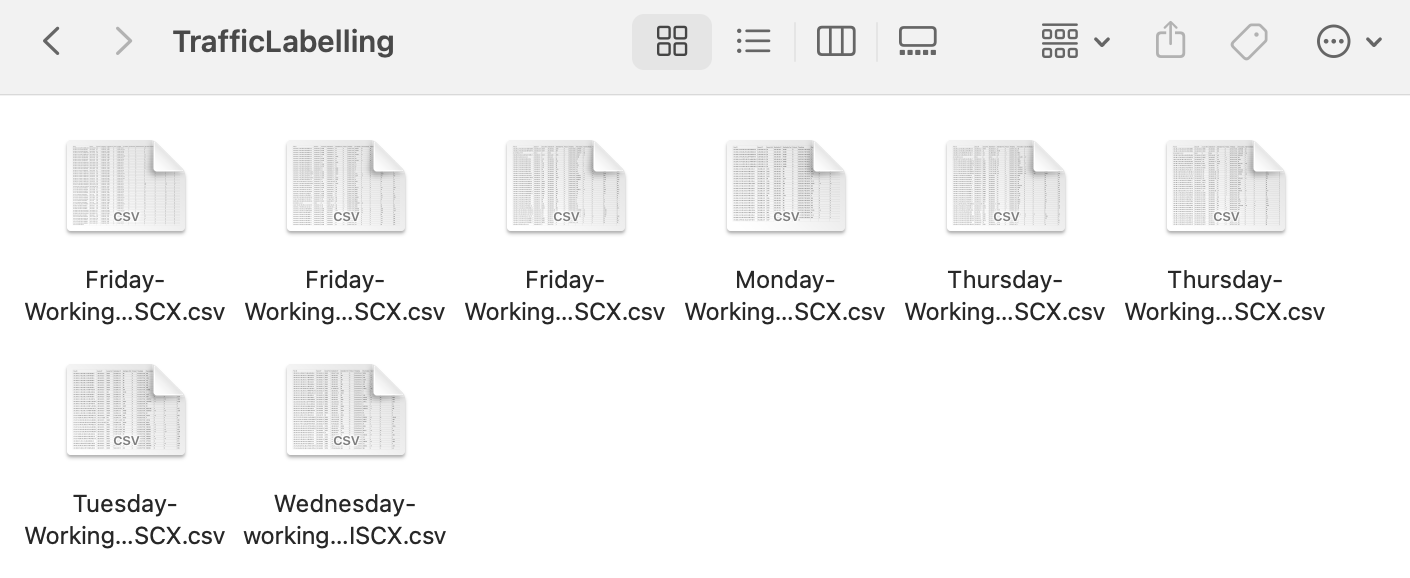

In [1]:
# Question 2
# Exploring the data types, summary statistics, and label distribution of Dataset 1

import pandas as pd

df = pd.read_csv('datasets/dataset 1.csv')

# Check the data types of the features
data_types = df.dtypes

# Summary statistics for numerical features
summary_statistics = df.describe()

# Check the distribution of label classes
label_distribution = df[' Label'].value_counts()

data_types, summary_statistics, label_distribution



(Flow ID               object
  Source IP            object
  Source Port           int64
  Destination IP       object
  Destination Port      int64
                       ...   
 Idle Mean            float64
  Idle Std            float64
  Idle Max              int64
  Idle Min              int64
  Label                object
 Length: 85, dtype: object,
          Source Port   Destination Port       Protocol   Flow Duration  \
 count  225745.000000       225745.00000  225745.000000    2.257450e+05   
 mean    38257.568402         8879.61946       7.600288    1.624165e+07   
 std     23057.302075        19754.64740       3.881586    3.152437e+07   
 min         0.000000            0.00000       0.000000   -1.000000e+00   
 25%     18990.000000           80.00000       6.000000    7.118000e+04   
 50%     49799.000000           80.00000       6.000000    1.452333e+06   
 75%     58296.000000           80.00000       6.000000    8.805237e+06   
 max     65534.000000        65532.00000  

**Qyestion 3**

**Why Supervised Learning and Classification?**
1. **Labeled Data**: Dataset 1 is labeled with two classes ('DDoS' and 'BENIGN'), making it ideal for supervised learning where the model learns from labeled examples.
2. **Binary Classification Task**: The objective is to classify network traffic into two categories (DDoS attack or benign), which is a typical binary classification problem.

**Why Random Forest Classifier?**
1. **Handling High Dimensionality**: Random Forest is effective in handling high-dimensional datasets like ours without the need for feature reduction.
2. **Robust to Overfitting**: It's generally more robust to overfitting compared to other algorithms like Decision Trees, as it builds multiple trees and merges their predictions.
3. **Feature Importance**: It can provide insights into which features are most important for classification, which is valuable for understanding network traffic patterns in intrusion detection.
4. **Good with Imbalanced Data**: It can handle imbalanced datasets well, which is often the case in cybersecurity contexts where one class (e.g., DDoS) might be significantly less frequent than the other (e.g., BENIGN).
5. **Versatility and Performance**: Random Forest is known for its high accuracy and performance in various classification tasks, including cybersecurity-related applications.


In [2]:
# Question 4

# Ensure correct column name (remove any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Process the 'Label' column: Assign 0 to 'BENIGN' and 1 to all others
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Check the balance of the classes
class_balance = df['Label'].value_counts()

print(class_balance)

1    128027
0     97718
Name: Label, dtype: int64


In [3]:
# Question 5

# List of important ports
important_ports = [80, 443, 21, 22, 25, 53]

# One-hot-encode important ports for Source Port and Destination Port
for port in important_ports:
    df[f'Source_Port_{port}'] = (df['Source Port'] == port).astype(int)
    df[f'Destination_Port_{port}'] = (df['Destination Port'] == port).astype(int)

# Assign unimportant ports to 'other ports'
df['Source_Other_Ports'] = (~df['Source Port'].isin(important_ports)).astype(int)
df['Destination_Other_Ports'] = (~df['Destination Port'].isin(important_ports)).astype(int)

# Drop the original Source Port and Destination Port columns
df = df.drop(['Source Port', 'Destination Port'], axis=1)


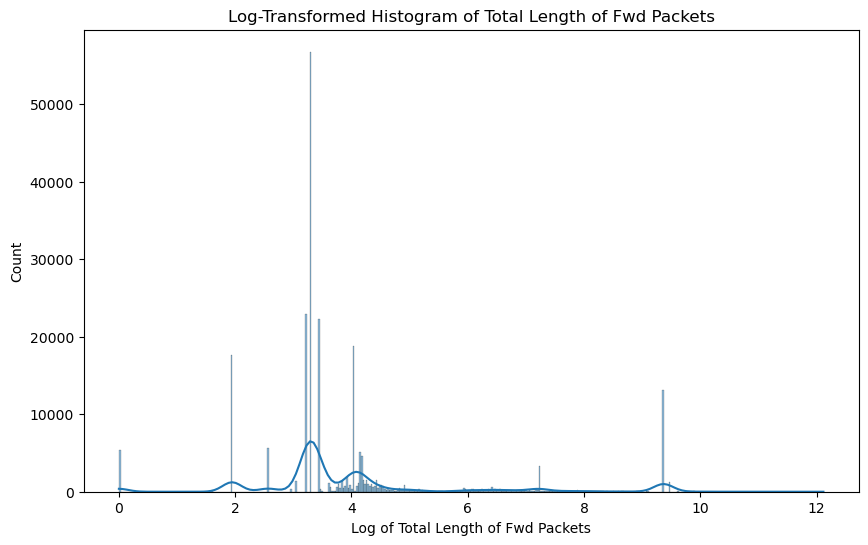

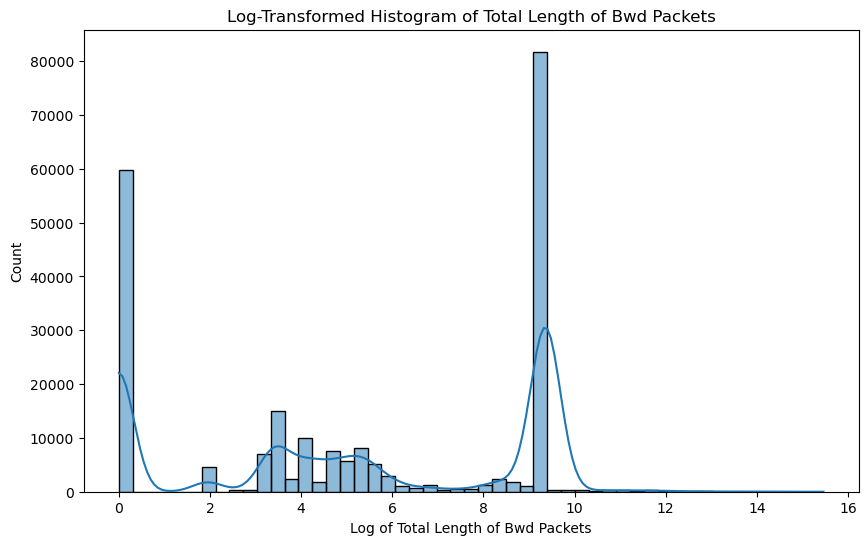

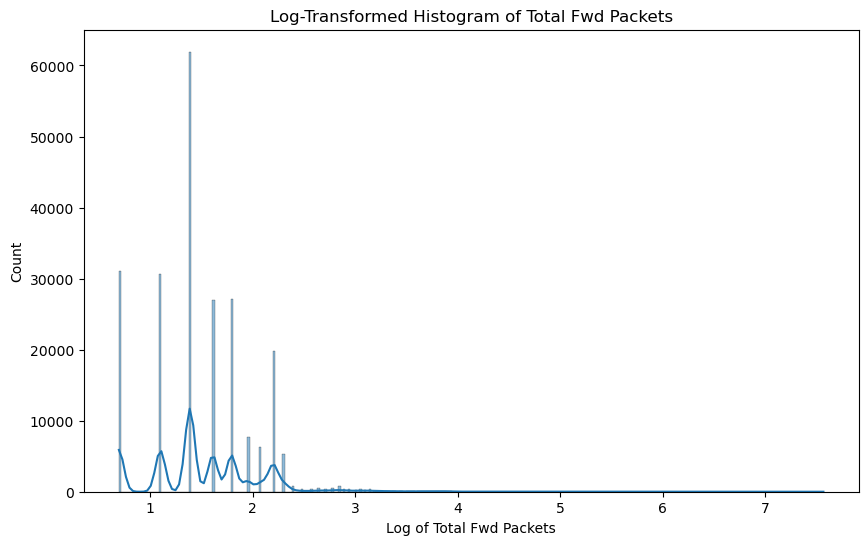

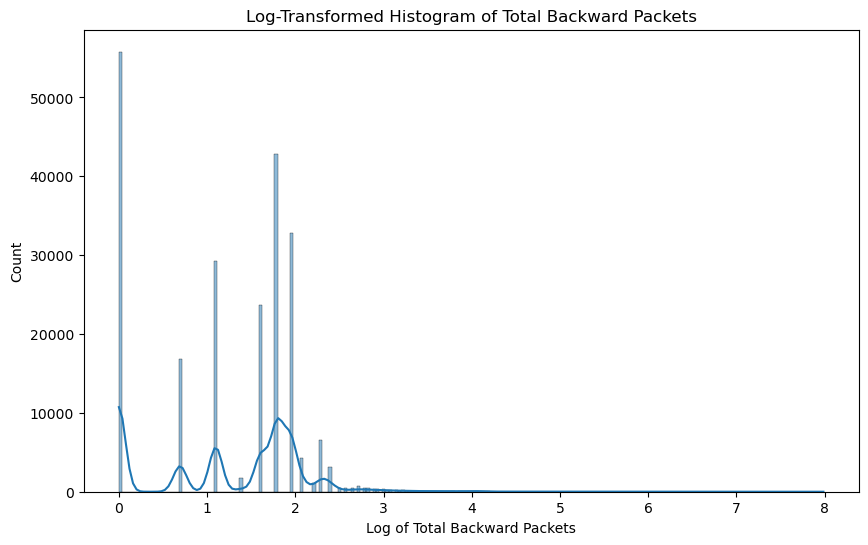

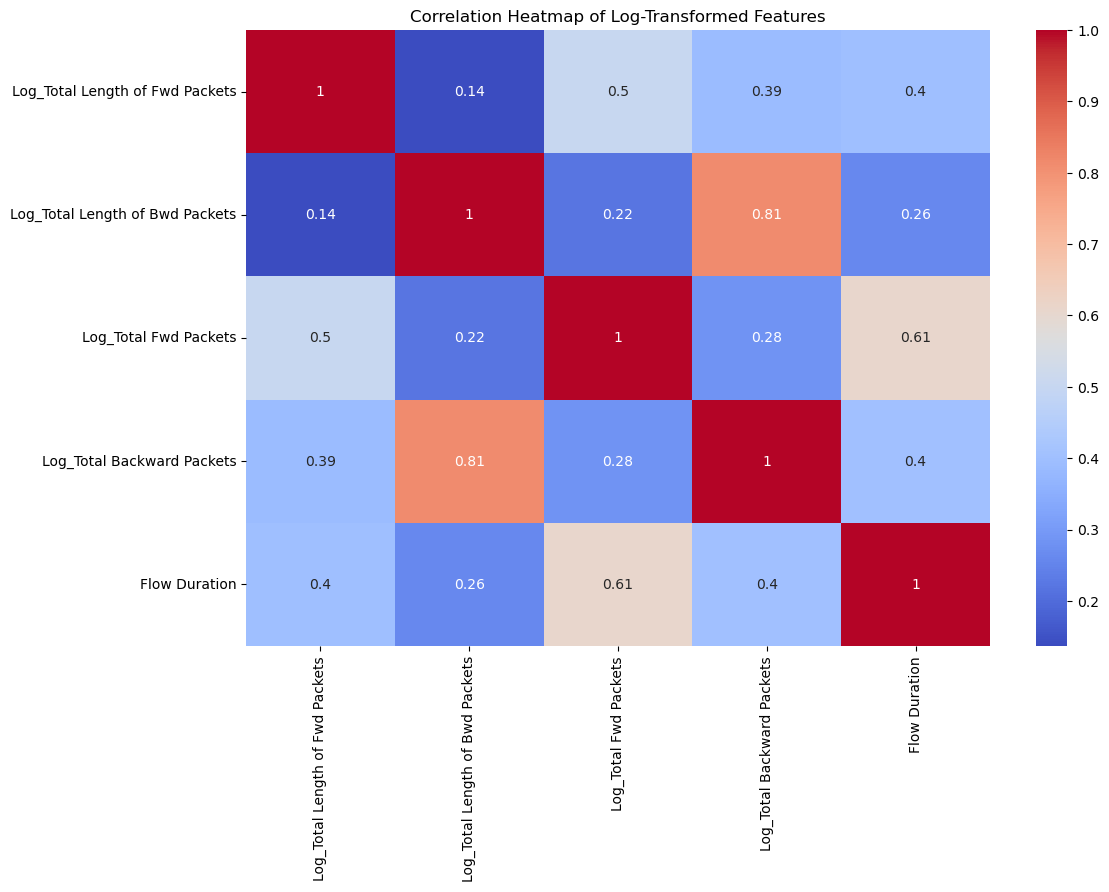

In [4]:
# Question 6

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the features for visualization including the one-hot-encoded port features
features_to_plot = ['Total Length of Fwd Packets', 'Total Length of Bwd Packets',
                    'Total Fwd Packets', 'Total Backward Packets', 'Flow Duration'] + \
                    [f'Source_Port_{port}' for port in important_ports] + \
                    [f'Destination_Port_{port}' for port in important_ports] + \
                    ['Source_Other_Ports', 'Destination_Other_Ports']

# Visualize histograms for each feature
for feature in features_to_plot:
    # Apply log transformation to numerical features that have a right-skewed distribution
    if 'Length' in feature or 'Packets' in feature:
        # Adding 1 to avoid log(0)
        df['Log_' + feature] = np.log1p(df[feature])
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Log_' + feature], kde=True)
        plt.title(f'Log-Transformed Histogram of {feature}')
        plt.xlabel(f'Log of {feature}')
        plt.ylabel('Count')
        plt.show()

# Generate a correlation heatmap for the numerical features only
numerical_features = ['Log_Total Length of Fwd Packets', 'Log_Total Length of Bwd Packets',
                      'Log_Total Fwd Packets', 'Log_Total Backward Packets', 'Flow Duration']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Log-Transformed Features')
plt.show()


**Question 6**

The log-transformed histograms of 'Total Length of Fwd Packets' and 'Total Length of Bwd Packets' show multimodal distributions with several distinct peaks, suggesting that these features encapsulate multiple behaviors within network traffic and may capture different types of flows. Despite some degree of correlation between these features, their varied distributions indicate that each contains unique information, which qualifies them as independent features for a predictive model.

The 'Total Fwd Packets' and 'Total Backward Packets' features, also log-transformed, exhibit similar multimodal patterns, indicating specific packet counts occur more frequently than others. This implies that these features can potentially differentiate between different kinds of network behavior, supporting their use as independent predictors in a model.

The 'Flow Duration' feature, not log-transformed and showing a right-skewed distribution, captures the temporal aspect of the network flows. Although there is some moderate correlation with other features, 'Flow Duration' holds unique temporal information, making it an independent feature relevant to the context of network analysis and capable of enhancing model performance. 

These features, with their distinct informational content and moderate correlations, can contribute independently to a machine learning model aimed at classifying network traffic.

In [5]:
# Question 7 

# Drop columns that are non-numeric and not encoded
columns_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']  
df = df.drop(columns=columns_to_drop)

In [6]:
# Question 7 

# Check the data types of all columns
print(df.dtypes)

# List all columns that are non-numeric
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
df = df.drop(columns=non_numeric_columns)

# After dropping non-numeric columns, recheck the datatypes
print(df.dtypes)

# Now, split the data into features and target variable
X = df.drop('Label', axis=1)
y = df['Label']


Protocol                             int64
Flow Duration                        int64
Total Fwd Packets                    int64
Total Backward Packets               int64
Total Length of Fwd Packets          int64
                                    ...   
Destination_Other_Ports              int64
Log_Total Length of Fwd Packets    float64
Log_Total Length of Bwd Packets    float64
Log_Total Fwd Packets              float64
Log_Total Backward Packets         float64
Length: 97, dtype: object
Non-numeric columns: Index([], dtype='object')
Protocol                             int64
Flow Duration                        int64
Total Fwd Packets                    int64
Total Backward Packets               int64
Total Length of Fwd Packets          int64
                                    ...   
Destination_Other_Ports              int64
Log_Total Length of Fwd Packets    float64
Log_Total Length of Bwd Packets    float64
Log_Total Fwd Packets              float64
Log_Total Backward Packe

In [7]:
# Question 7 

# Checking for NaNs
if df.isnull().values.any():
    print("There are NaN values in the dataset.")
    df = df.fillna(method='ffill')  # Fill NaNs

# Checking for infinite values
if np.isinf(df.values).any():
    print("There are infinite values in the dataset.")
    df = df.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # Replace infinities


There are NaN values in the dataset.
There are infinite values in the dataset.


In [8]:
# Question 7 

from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Question 7 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Running 10-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f"{name} - Mean CV Accuracy: {np.mean(scores):.4f}, Standard Deviation: {np.std(scores):.4f}")


/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Logistic Regression - Mean CV Accuracy: 0.9477, Standard Deviation: 0.0032
Decision Tree - Mean CV Accuracy: 0.9999, Standard Deviation: 0.0001
Random Forest - Mean CV Accuracy: 0.9999, Standard Deviation: 0.0000


In [10]:
# Question 8 

import pandas as pd

# List of dataset file paths
dataset_files = ['datasets/dataset 2.csv', 'datasets/dataset 3.csv', 'datasets/dataset 4.csv', 'datasets/dataset 5.csv', 'datasets/dataset 6.csv', 'datasets/dataset 7.csv', 'datasets/dataset 8.csv']

# Loop over each file and check the class distribution
for file in dataset_files:
    try:
        # Attempt to read the file with utf-8 encoding
        df = pd.read_csv(file)
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try reading with ISO-8859-1 encoding
            df = pd.read_csv(file, encoding='ISO-8859-1')
        except UnicodeDecodeError:
            # As a last resort, try utf-16
            df = pd.read_csv(file, encoding='utf-16')

    class_distribution = df[' Label'].value_counts()
    
    # Check if the dataset has more than one class
    if len(class_distribution) > 1:
        print(f"{file} has more than one class")
    else:
        print(f"{file} has only one class: {class_distribution.index[0]}")



datasets/dataset 2.csv has more than one class
datasets/dataset 3.csv has more than one class
datasets/dataset 4.csv has only one class: BENIGN
datasets/dataset 5.csv has more than one class


/var/folders/t4/5vcrg1rs4sgcl1002flt_bjw0000gn/T/ipykernel_2689/2238431612.py:16: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='ISO-8859-1')


datasets/dataset 6.csv has more than one class
datasets/dataset 7.csv has more than one class
datasets/dataset 8.csv has more than one class


In [11]:
# Question 8

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score

# List of important ports
important_ports = [80, 443, 21, 22, 25, 53]

def preprocess_dataset(df):
    df.columns = df.columns.str.strip()

    # Process 'Label' column
    if 'Label' in df.columns:
        df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

    # One-hot-encode important ports
    for port in important_ports:
        df[f'Source_Port_{port}'] = (df['Source Port'] == port).astype(int)
        df[f'Destination_Port_{port}'] = (df['Destination Port'] == port).astype(int)
    df['Source_Other_Ports'] = (~df['Source Port'].isin(important_ports)).astype(int)
    df['Destination_Other_Ports'] = (~df['Destination Port'].isin(important_ports)).astype(int)
    df = df.drop(['Source Port', 'Destination Port'], axis=1)

    # Drop non-numeric and non-encoded columns
    columns_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
    df = df.drop(columns=columns_to_drop)
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    df = df.drop(columns=non_numeric_columns)

    # Fill NaNs and replace infinite values
    df = df.fillna(method='ffill').replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

    return df

# Paths to the datasets
dataset_paths = ['datasets/dataset 2.csv', 'datasets/dataset 3.csv', 'datasets/dataset 3.csv',
                 'datasets/dataset 5.csv', 'datasets/dataset 6.csv', 
                 'datasets/dataset 7.csv', 'datasets/dataset 8.csv']



In [12]:
# Question 9 

for i, dataset_path in enumerate(dataset_paths):
    try:
        df = pd.read_csv(dataset_path, encoding='ISO-8859-1')
        df = preprocess_dataset(df)

        if 'Label' in df.columns:
            X = df.drop('Label', axis=1)
            y = df['Label']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                
            rf_model = RandomForestClassifier()
            rf_model.fit(X_train, y_train)
            y_pred = rf_model.predict(X_test)
                
            print(f"Classification Report for {dataset_path}:\n{classification_report(y_test, y_pred)}")
        else:
            print(f"Label column not found in {dataset_path}. Skipping this dataset.")
    except UnicodeDecodeError as e:
        print(f"Error reading {dataset_path}: {e}")

Classification Report for datasets/dataset 2.csv:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294

Classification Report for datasets/dataset 3.csv:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       0.99      0.99      0.99       374

    accuracy                           1.00     38207
   macro avg       1.00      1.00      1.00     38207
weighted avg       1.00      1.00      1.00     38207

Classification Report for datasets/dataset 3.csv:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       1.00      0.99      0.99       374

    accuracy                    

/var/folders/t4/5vcrg1rs4sgcl1002flt_bjw0000gn/T/ipykernel_2689/2377292561.py:5: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path, encoding='ISO-8859-1')


Classification Report for datasets/dataset 6.csv:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33513
           1       1.00      1.00      1.00     58281

    accuracy                           1.00     91794
   macro avg       1.00      1.00      1.00     91794
weighted avg       1.00      1.00      1.00     91794

Classification Report for datasets/dataset 7.csv:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       1.00      1.00      1.00      2771

    accuracy                           1.00     89182
   macro avg       1.00      1.00      1.00     89182
weighted avg       1.00      1.00      1.00     89182

Classification Report for datasets/dataset 8.csv:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       1.00      1.00      1.00     50371

    accuracy                    

In [13]:
# Question 9 
# Dataset 4 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def preprocess_unsupervised(df):
    # Strip column names
    df.columns = df.columns.str.strip()

    # Drop non-relevant/non-numeric columns and the 'Label' column
    columns_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Label']
    df = df.drop(columns=columns_to_drop)
    
    # Convert columns to numeric and drop those that cannot be converted
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(axis=1, inplace=True)

    # Fill NaNs and replace infinite values
    df = df.fillna(method='ffill').replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

    # Normalize the dataset
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    return pd.DataFrame(df_scaled, columns=df.columns)

# Load dataset
df = pd.read_csv('datasets/dataset 4.csv', encoding='ISO-8859-1')
df_preprocessed = preprocess_unsupervised(df)

In [14]:
# Question 9

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# subset of the data
df_sampled = resample(df_preprocessed, n_samples=10000, random_state=42)

# Applying Nearest Neighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_sampled)
distances, indices = nbrs.kneighbors(df_sampled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plotting the distances
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Sorted Nearest Neighbor Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to nearest neighbor')
plt.grid(True)

# Annotating the 'knee'
knee_index = np.argmax(np.diff(distances))
knee_value = distances[knee_index]
plt.annotate('Elbow Point', xy=(knee_index, knee_value),
             xytext=(knee_index, knee_value + 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             ha='center')

plt.show()

# The 'eps' value for DBSCAN would be approximately the distance at the 'knee'.
eps_value = knee_value
print("Estimated eps value for DBSCAN:", eps_value)




NameError: name 'resample' is not defined

In [ ]:
# Question 9

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN on the reduced data
dbscan = DBSCAN(eps=eps_value, min_samples=5)
clusters = dbscan.fit_predict(df_pca)

# Output results
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Calculating Silhouette Score
silhouette_avg = silhouette_score(df_pca, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


**Question 10**

Embarking on the journey of developing a machine learning model for cybersecurity intrusion detection as a non-expert in the field has been both enlightening and challenging. The intricate nature of cybersecurity data, with its specific protocols and potential threats, posed a significant hurdle in understanding and appropriately processing the data. As a machine learning enthusiast, I realized early on the importance of domain-specific knowledge in selecting relevant features and training the model effectively. It required me to delve deeper into the subject, learning about various aspects of network traffic and cyber threats to make informed decisions.

The iterative process of model development, starting from simpler models to more complex ones, helped in gradually building up the accuracy and reliability of the intrusion detection system. This approach ensured that the learning curve did not hinder the development process but rather complemented it. Leveraging existing datasets and tools within the cybersecurity community was crucial in validating the model’s effectiveness and ensuring that it met industry standards.

On a personal note, the journey through this project was especially significant when dealing with unsupervised machine learning for dataset 4, which only had one class and thus presented unique challenges. It took considerable time and effort to figure out the appropriate approach, particularly in selecting and fine-tuning DBSCAN. This experience reinforced the importance of persistence and adaptability in problem-solving, particularly when exploring complex data without clear labels or predefined categories. It was a profound learning experience that underscored the value of exploration and the patience required in machine learning endeavors, especially when venturing into a new domain.